## Importing Required Libraries

In [1]:
#Importing Pandas and NumPy
import pandas as pd
import numpy as np

#Importing Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#For RandomForest Implementation
from sklearn.ensemble import RandomForestClassifier

#Libraries for KNN Implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#for Support Vector Classifier
from  sklearn.svm import SVC

#Libraries for Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

## Data Exploration

In [2]:
customer_data = pd.read_csv('Coursework.csv')

In [3]:
categ_columns = ['Weekend','Month','VisitorType','TrafficType','Region','Browser','OperatingSystems','Revenue']

In [4]:
num_cols = [column for column in customer_data.columns if column not in categ_columns]

## Data Encoding for Categorical Columns

In [5]:
def onehot_encode(df,column,prefix):
  df = df.copy()
  dummies = pd.get_dummies(df[column],prefix=prefix)
  df = pd.concat([df,dummies],axis = 1)
  df = df.drop(column,axis = 1)
  return df

In [6]:
customer_data2 = customer_data.copy()
customer_data2['Weekend'] = customer_data['Weekend'].astype(np.int)
customer_data2['Revenue'] = customer_data['Revenue'].astype(np.int)
for col in categ_columns:
  if col == 'Revenue':
    continue
  else:
    temp = onehot_encode(customer_data2,col,prefix=col)
    customer_data2 = temp

In [7]:
customer_data2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Weekend_0,Weekend_1,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Independent and Dependent fields separation

In [8]:
X = customer_data2.drop('Revenue',axis = 1)
y = customer_data2['Revenue'].copy()

## Splitting the data as 80:20 ration size with random state 27

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

## RandomForest Classifier

param_grid ={
    'bootstrap': [True],
    'max_depth': [8,9,10],
    'max_features' : ['auto'],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[2,6,8],
    'n_estimators':[100,200,300,1000]
}
rf_model = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=None,verbose=2)
print('Best grid for GridSearchCV:',rf_model.best_params_)

Training Accuracy : 0.9263990267639902
Testing Accuracy : 0.9083536090835361
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2109
           1       0.80      0.48      0.60       357

    accuracy                           0.91      2466
   macro avg       0.86      0.73      0.78      2466
weighted avg       0.90      0.91      0.90      2466



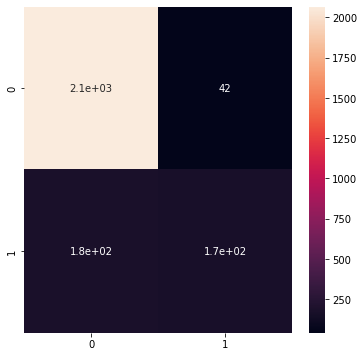

In [10]:
rf_model = RandomForestClassifier(bootstrap =True,
                                  max_depth= 10,
                                  max_features= 'auto',
                                  min_samples_leaf= 3,
                                  min_samples_split= 2,
                                  n_estimators= 200)

rf_model.fit(X_train, y_train)



rf_y_pred = rf_model.predict(X_test)


# evaluating the model
print("Training Accuracy :", rf_model.score(X_train, y_train))
print("Testing Accuracy :", rf_model.score(X_test, y_test))

# confusion matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(rf_cm ,annot = True)

# classification report
rf_cr = classification_report(y_test, rf_y_pred)
print(rf_cr)

## Feature Scaling for KNN and SVC Algorithms

In [11]:
stand_cols = [column for column in customer_data2.columns if column not in num_cols]
new_stand_cols = customer_data2.drop(stand_cols,axis=1)

scaler = StandardScaler()

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# apply standardization on numerical features
for i in new_stand_cols.columns:
    
    # fit on training data column
    scale = scaler.fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

## Model Fitting using KNN Classifier

K Value using GridSearchCV: {'n_neighbors': 9}
Training Accuracy : 0.8907137064071371
Testing Accuracy : 0.8868613138686131
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2109
           1       0.70      0.38      0.50       357

    accuracy                           0.89      2466
   macro avg       0.80      0.68      0.72      2466
weighted avg       0.87      0.89      0.87      2466



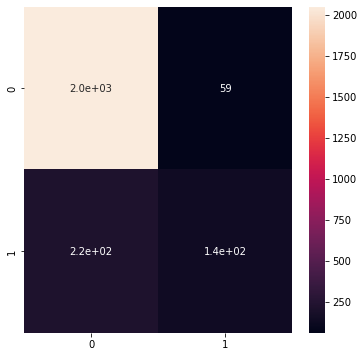

In [12]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn,params,cv=5)


trainX = X_train_stand
testX = X_test_stand

# fit
knn_model.fit(trainX,y_train)
# predict
print('K Value using GridSearchCV:',knn_model.best_params_)
# RMSE
knn_y_pred = knn_model.predict(testX)

# evaluating the model
print("Training Accuracy :", knn_model.score(trainX, y_train))
print("Testing Accuracy :", knn_model.score(testX, y_test))

# confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(knn_cm ,annot = True)

# classification report
knn_cr = classification_report(y_test, knn_y_pred)
print(knn_cr)

## Model Fitting using Support Vector Classifier

In [13]:
#To Identify the best parameters
#param_grid = {'C': [0.1,1.0,10.0,100.0],'gamma':[0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
#svc_model = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
#print(svc_model.best_estimator_)

In [14]:
svc_model = SVC(probability=True,kernel='rbf',C=1.0,gamma=0.1)

svc_trainX = X_train_stand
svc_testX = X_test_stand

svc_model.fit(svc_trainX,y_train)

SVC(gamma=0.1, probability=True)

Training Accuracy : 0.9177818329278183
Testing Accuracy : 0.8990267639902676
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2109
           1       0.71      0.50      0.59       357

    accuracy                           0.90      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466



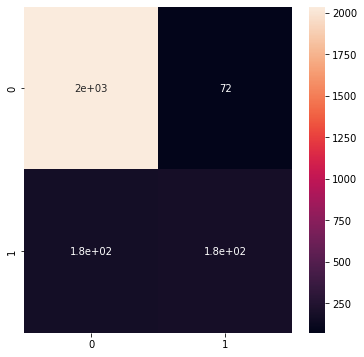

In [15]:
# predict
svc_y_pred = svc_model.predict(testX)

# evaluating the model
print("Training Accuracy :", svc_model.score(trainX, y_train))
print("Testing Accuracy :", svc_model.score(testX, y_test))

# confusion matrix
svc_cm = confusion_matrix(y_test, svc_y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(svc_cm ,annot = True)

# classification report
svc_cr = classification_report(y_test, svc_y_pred)
print(svc_cr)

## Model Performance Evaluation 

In [16]:
rf_prob = rf_model.predict_proba(X_test)
knn_prob = knn_model.predict_proba(testX)
svc_prob = svc_model.predict_proba(svc_testX)

In [17]:
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test,rf_prob[:,1],pos_label=1)
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test,knn_prob[:,1],pos_label=1)
svc_fpr,svc_tpr,svc_thresh = roc_curve(y_test,svc_prob[:,1],pos_label=1)

In [18]:
random_probs = [0 for i in range(len(y_test))]

p_fpr, p_tpr,_ = roc_curve(y_test,random_probs,pos_label=1)

rf_auc_score = roc_auc_score(y_test,rf_prob[:,1])
knn_auc_score = roc_auc_score(y_test, knn_prob[:,1])
svc_auc_score = roc_auc_score(y_test,svc_prob[:,1])


print(rf_auc_score, knn_auc_score,svc_auc_score)

0.9244587356042465 0.8363761815774199 0.897112282561199


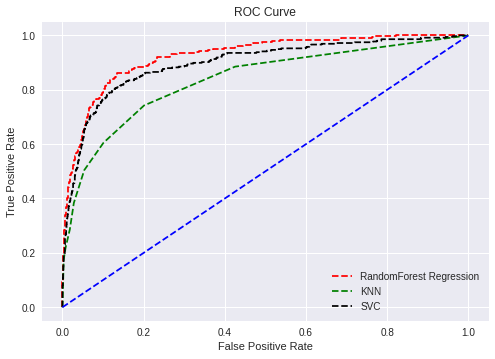

In [19]:
plt.style.use('seaborn')

#plot roc curves
plt.plot(rf_fpr,rf_tpr,linestyle='--',color='red',label='RandomForest Regression')
plt.plot(knn_fpr,knn_tpr,linestyle='--',color='green',label='KNN')
plt.plot(svc_fpr,svc_tpr,linestyle='--',color='black',label='SVC')

plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')

#title
plt.title('ROC Curve')

#X label
plt.xlabel('False Positive Rate')

#y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

## Conclusion
### It is evident from the plot that the AUC for the RandomForest classifier is higher that that for the KNN and SVC ROC curve.Therefore, we can say that RandomForest classifier did a better job of classifying the positive class in dataset 